# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from kmeans.kmeans import kmeans
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]

Accuracy:
0.9633333333333333

Standard Deviation:
0.02768874620972691

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0               12               1
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor               13               1            0
Iris-virginica                 0               7            0
Iris-setosa                    0               0            9
                 Iris-virginica  Iris-setosa  I

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,0,9


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.8666666666666667, 0.8333333333333334, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8666666666666667, 0.9333333333333333, 1.0, 0.9]

Accuracy:
0.925

Standard Deviation:
0.04579543888011361

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0               10               3
Iris-virginica             0                1               7
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor               12               2            0
Iris-virginica                 3               4            0
Iris-setosa                    0               0            9
                 Iris-virginic

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,9,0
Iris-virginica,0,1,8


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.8, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]

Accuracy:
0.95

Standard Deviation:
0.0510990323891863

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0                9               4
Iris-virginica             0                2               6
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor               13               1            0
Iris-virginica                 0               7            0
Iris-setosa                    0               0            9
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                9            0                0
Iris-setosa              

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,9,1
Iris-virginica,0,0,9


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
46            5.1          3.8
41            4.5          2.3
85            6.0          3.4
146           6.3          2.5
11            4.8          3.4
..            ...          ...
144           6.7          3.3
137           6.4          3.1
6             4.6          3.4
7             5.0          3.4
23            5.1          3.3

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
107           7.3          2.9
3             4.6          3.1
135           7.7          3.0
118           7.7          2.6
22            4.6          3.6
139           6.9          3.1
66            5.6          3.0
47            4.6          3.2
65            6.7          3.1
16            5.4          3.9
119           6.0          2.2
5             5.4          3.9
27            5.2          3.5
123           6.3          2.7
1             4.9          3.0
74            6.4          2.9
75            6.6          3.0
83            6.0

# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

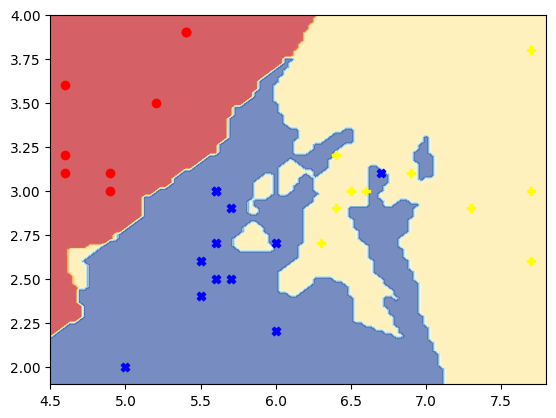

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

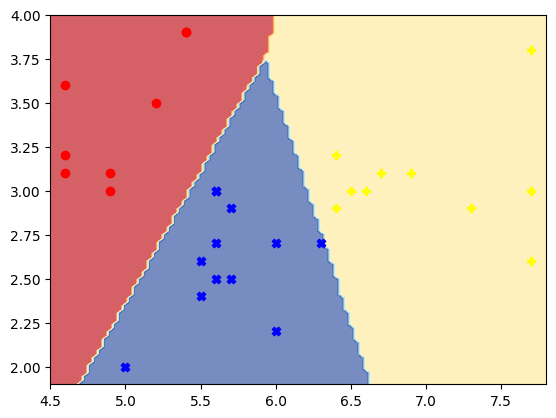

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting kmeans decision surface

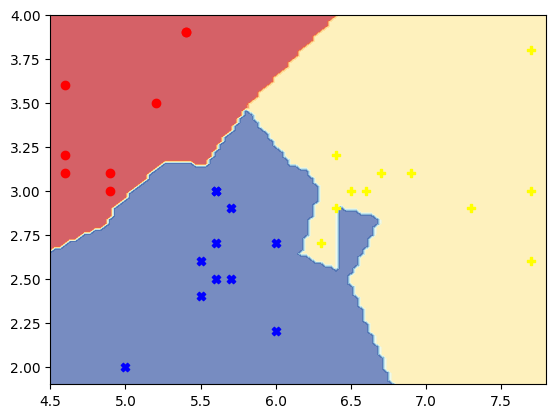

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

setosa = np.where(kmeans_y_pred == 'Iris-setosa')
virginica = np.where(kmeans_y_pred == 'Iris-virginica')
versicolor = np.where(kmeans_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()